# WEEK-5. Logistic Regression with Diabetes


# Ver.1

#### **0단계: 툴&데이터 불러오기**

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data1 = pd.read_csv('/content/drive/MyDrive/(DAT)데이터분석학회/Week5/diabetes_prediction_dataset.csv')
data1

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


#### **1단계 : 데이터 전처리**

In [6]:
# 1.결측값 확인
print(data1.isnull().sum())

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [7]:
# 2. 
data1['gender'].value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

In [8]:
# 2.
data1['smoking_history'].value_counts()

No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: smoking_history, dtype: int64

In [9]:
# 3. 'gender'열의 값을 이항변수로 변환
data1 = data1[data1.gender != 'Other']            # 이상치(gender='Other') 18개행 제거
data1 = data1.replace({'gender':'Female'}, 0)    # Female <- 0으로 교체
data1 = data1.replace({'gender':'Male'},1)       # Male <- 1로 교체

In [10]:
# 4.
data2 = pd.get_dummies(data=data1, columns=['smoking_history'])
data2

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0,80.0,0,1,25.19,6.6,140,0,0,0,0,0,1,0
1,0,54.0,0,0,27.32,6.6,80,0,1,0,0,0,0,0
2,1,28.0,0,0,27.32,5.7,158,0,0,0,0,0,1,0
3,0,36.0,0,0,23.45,5.0,155,0,0,1,0,0,0,0
4,1,76.0,1,1,20.14,4.8,155,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,27.32,6.2,90,0,1,0,0,0,0,0
99996,0,2.0,0,0,17.37,6.5,100,0,1,0,0,0,0,0
99997,1,66.0,0,0,27.83,5.7,155,0,0,0,0,1,0,0
99998,0,24.0,0,0,35.42,4.0,100,0,0,0,0,0,1,0


In [11]:
Y = data1.iloc[:,8].values
X1 = data2.drop(labels='diabetes', axis=1)

In [12]:
X = X1.drop(labels='smoking_history_No Info', axis=1)

In [13]:
X

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,0,80.0,0,1,25.19,6.6,140,0,0,0,1,0
1,0,54.0,0,0,27.32,6.6,80,0,0,0,0,0
2,1,28.0,0,0,27.32,5.7,158,0,0,0,1,0
3,0,36.0,0,0,23.45,5.0,155,1,0,0,0,0
4,1,76.0,1,1,20.14,4.8,155,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,27.32,6.2,90,0,0,0,0,0
99996,0,2.0,0,0,17.37,6.5,100,0,0,0,0,0
99997,1,66.0,0,0,27.83,5.7,155,0,0,1,0,0
99998,0,24.0,0,0,35.42,4.0,100,0,0,0,1,0


In [14]:
Y

array([0, 0, 0, ..., 0, 0, 0])

#### **2단계 : 모델링**

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [16]:
# 정규화(정규화 단계가 없다면 아래 셀에서 오류 발생)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [17]:
# 윗 셀에서 진행한 정규화 단계를 진행하지 않으면서 오류를 발생시키지 않으려면 
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

LogisticRegression()

#### **3단계 : 모델 측정/예측**

In [18]:
# 모델의 score 측정
print('1.classifier.score(X_train, Y_train):\t', classifier.score(X_train, Y_train))
print('2.classifier.score(X_test, Y_test):\t',classifier.score(X_test, Y_test))

1.classifier.score(X_train, Y_train):	 0.9602300431330875
2.classifier.score(X_test, Y_test):	 0.9612441866279942


In [19]:
# 회귀계수 측정
classifier.coef_

array([[0.12728349, 1.01685991, 0.18960999, 0.14684469, 0.58291692,
        2.5114199 , 1.33669881, 0.2025992 , 0.14188532, 0.18791942,
        0.26654626, 0.12458596]])

In [20]:
# 절편값 측정
classifier.intercept_

array([-5.29192183])

In [21]:
# 예측값
Y_pred = classifier.predict(X_test)
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [22]:
# 혼동행렬을 이용한 측정
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, Y_pred)
cm

# True Negative(1)    False Positive(1)
# 불합격예측          합격예측
# 불합격실제          합격실제

# False Negative(0)  True Positive(2)
# 불합격예측          합격예측 
# 합격실제            합격실제

array([[18130,   159],
       [  616,  1092]])

#### **4단계 : 추가 예측**

In [23]:
import numpy as np

# gender : female<-0    male<-1
# hypertension(고혈압) : 0<-없음  1<-있음
# heart_disease(심장질환) : 0<-없음  1<-있음
# HbA1C_level(혈중당화혈색소-수치) : 수치
# blood_glucose_level() : 수치
# smoking(흡연시기-Dummy) : 

# patient n = np.array([gender, age, hypertention, heart_disease, bmi, HbA1c_level, blood_glucose_level, smoking_history_current, smoking_history_ever, smoking_history_former, smoking_history_never, smoking_history_not current])

patient1 = np.array([0, 22, 1, 0, 32.7 , 4.5, 125, 0,0,0,0,0]) # 22세 여자, 고혈압 있음, 심장질환 없음, bmi 32.7, HbA1c값 4.5, 혈중글루코세값 125, 비흡연자
patient2 = np.array([1, 45, 1, 0, 28.9 , 3.9, 135, 1,0,0,0,0]) # 45세 남자, 고혈압 있음, 심장질환 없음, bmi 28.9, HbA1c값 3.9, 혈중글루코세값 135, 흡연자
patient3 = np.array([1, 22, 0, 0, 23.3 , 2.5, 155, 0,0,0,0,0]) # 22세 남자, 고혈압 없음, 심장질환 없음, bmi 23.3, HbA1c값 2.5, 혈중글루코세값 155, 비흡연자

sample = np.array([patient1, patient2, patient3])

In [24]:
# Warning 발생 문제 해결 실패
sample = scaler.transform(sample)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [25]:
# 상단의 patient1, patient2, patient3 에 대한 예측값을 출력
classifier.predict(sample)

array([0, 0, 0])

In [26]:
# patient1, patient2, patient3에 대한 예측값의 확률
classifier.predict_proba(sample)

array([[9.99776256e-01, 2.23744339e-04],
       [9.99599750e-01, 4.00250260e-04],
       [9.99998477e-01, 1.52303898e-06]])

#### **데이터 불러오기**

# Ver.2

#### **0단계: 툴&데이터 불러오기**

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset=pd.read_csv("/content/drive/MyDrive/(DAT)데이터분석학회/Week5/diabetes_prediction_dataset.csv")

#### **1단계 : 데이터 전처리**

In [28]:
gender_dummies = pd.get_dummies(dataset['gender'])
smoking_history_dummies = pd.get_dummies(dataset['smoking_history'])
df = pd.concat([dataset, gender_dummies, smoking_history_dummies], axis=1)
df=df.drop(['gender','smoking_history','Other','No Info','not current'],axis=1)

In [29]:
df['age'] = df['age'].astype(int)

In [30]:
cols = df.columns.tolist()
cols.remove('diabetes')
df=df[cols+['diabetes']]
df

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,Female,Male,current,ever,former,never,diabetes
0,80,0,1,25.19,6.6,140,1,0,0,0,0,1,0
1,54,0,0,27.32,6.6,80,1,0,0,0,0,0,0
2,28,0,0,27.32,5.7,158,0,1,0,0,0,1,0
3,36,0,0,23.45,5.0,155,1,0,1,0,0,0,0
4,76,1,1,20.14,4.8,155,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,80,0,0,27.32,6.2,90,1,0,0,0,0,0,0
99996,2,0,0,17.37,6.5,100,1,0,0,0,0,0,0
99997,66,0,0,27.83,5.7,155,0,1,0,0,1,0,0
99998,24,0,0,35.42,4.0,100,1,0,0,0,0,1,0


#### **2단계 : 모델링**

In [31]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

#x=df['age']
#y=df['diabetes']

#x=x.values.reshape(-1, 1)
#x.shape
#y=y.values.reshape(-1, 1)
#y.shape


In [32]:
from sklearn.model_selection import train_test_split # split하면 4개 데이터로 분리됨
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [33]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

#### **3단계 : 모델 측정/예측**

In [34]:
y_pred=classifier.predict(x_test)
y_pred #예측 값

array([0, 0, 0, ..., 0, 0, 0])

In [35]:
ypred=classifier.predict_proba(x_test)
ypred#예측 값

array([[9.98126372e-01, 1.87362793e-03],
       [9.99413386e-01, 5.86614109e-04],
       [9.87310477e-01, 1.26895231e-02],
       ...,
       [9.56342006e-01, 4.36579945e-02],
       [9.99896650e-01, 1.03349778e-04],
       [9.98553125e-01, 1.44687540e-03]])

In [36]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred) 
cm
# [1.1]  왼쪽 1: 불합격(예측)=>불합격(실제) 오른쪽 1: 합격(예측)=>불합격(실제)
# [0.2]  왼쪽 0: 합격(예측)=> 불합격(실제)  오른쪽 2: 합격(예측)=>합격(실제)

array([[18116,   181],
       [  629,  1074]])

#### **4단계 : 추가 예측**

In [37]:
classifier.score(x_test, y_test) #모델 평가
# 전체 테스트 세트 4개 중에서 분류 예측을 올바로 맞힌 개수 3개->3/4=0.75
# 회귀랑 다르게 맞힌 개수로 바로 점수로 반영됨

0.9595

In [38]:
classifier.coef_

array([[ 0.03729812,  0.63206745,  1.42163325,  0.0905712 ,  2.18089826,
         0.03405473, -8.65539689, -8.60495365,  0.22140793,  0.180422  ,
         0.38291468,  0.1224963 ]])

In [39]:
classifier.intercept_

array([-17.39498349])

# 시각화

In [40]:
import pandas as pd
data = pd.read_csv("/content/drive/MyDrive/(DAT)데이터분석학회/Week5/diabetes_prediction_dataset.csv")

In [41]:
X = data.iloc[:, 1].values
Y = data.iloc[:, -1].values
X = X.reshape(-1, 1)

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [43]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, Y_train)

LogisticRegression()

In [44]:
Y_pred = classifier.predict_proba(X_train)
Y_pred = np.delete(Y_pred, 0, axis = 1)

Text(0, 0.5, 'P')

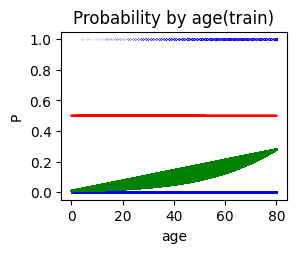

In [45]:
# X_range = np.arange(min(data["age"]), max(data["age"]))
# X의 최소값에서 최대값까지를 0.1 단위로 잘라서 데이터 생성

# p = 1 / (1 + np.exp(-(classifier.coef_ * X_train + classifier.intercept_))) # y = mx + b
# p = p.reshape(-1)

plt.subplot(221)
plt.scatter(X_train, Y_train, color = "blue", s = 0.001)
plt.plot(X_train, Y_pred, color = "green")
plt.plot(X_train, np.full(len(X_train), 0.5), color = "red")
plt.title("Probability by age(train)")
plt.xlabel("age")
plt.ylabel("P")

# plt.subplot(222)
# plt.scatter(X_test, y_test, color = "blue", s = 0.001)
# plt.plot(X_test, y_pred, color = "green")
# plt.plot(X_test, np.full(len(X_test), 0.5), color = "red")
# plt.title("Probability by age(test)")
# plt.xlabel("age")
# plt.ylabel("P")

# plt.show()